In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import sys
sys.path.insert(1, '../auxiliary_scripts')
from output_postprocessing import parse_methane_series, parse_layer_file, parse_univariate_file

In [2]:
path_to_soil_temps = '/home/amullen/LAKE/results/YKD-burned-talik-test/time_series/soil_temp  1  1f2.dat'
path_to_ch4 = '/home/amullen/LAKE/results/YKD-burned-talik-test/time_series/methane_series  1  1.dat'

In [3]:
soil_temp = parse_univariate_file(path_to_soil_temps, 'soil_temp')
ch4 = parse_methane_series(path_to_ch4)

In [6]:
soil_temp['depth'].unique()

array([-0.0e+00, -1.0e-01, -2.0e-01, -3.0e-01, -4.0e-01, -5.0e-01,
       -6.0e-01, -7.0e-01, -8.0e-01, -9.0e-01, -1.0e+00, -2.0e+00,
       -3.0e+00, -4.0e+00, -5.0e+00, -6.0e+00, -7.0e+00, -8.0e+00,
       -9.0e+00, -1.0e+01, -2.0e+01, -3.0e+01, -4.0e+01, -5.0e+01,
       -6.0e+01, -7.0e+01, -8.0e+01, -9.0e+01, -1.0e+02, -1.2e+02,
       -1.4e+02, -1.6e+02, -1.8e+02])

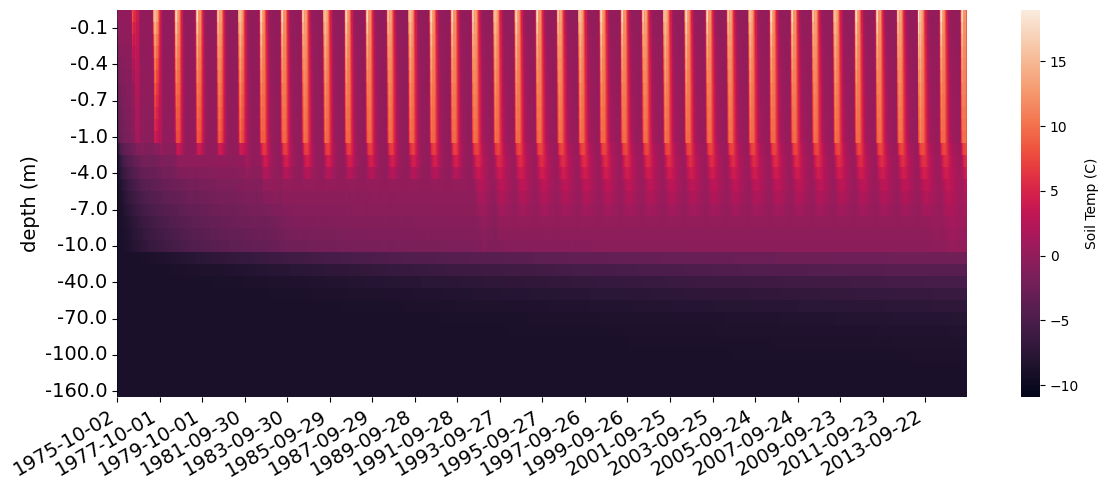

In [18]:
pd.plotting.register_matplotlib_converters()
soil_temp=soil_temp.loc[soil_temp['soil_temp']!=-999][['Date', 'depth', 'soil_temp', 'thaw']]
soil_temp['Date'] = pd.to_datetime(soil_temp['Date'])
soil_temp['Date'] = soil_temp['Date'].dt.date

pivot = soil_temp.pivot(index='depth', columns='Date', values='soil_temp')
fig, ax = plt.subplots(1,1,figsize=(12,5))

sns.heatmap(pivot, cmap='rocket', ax=ax, xticklabels=730, yticklabels=3, cbar_kws = {'label':'Soil Temp (C)'})
plt.ylabel('depth (m)', fontsize=14)
plt.xlabel('')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.gca().invert_yaxis()

fig.autofmt_xdate()
fig.tight_layout()

<Axes: xlabel='Date', ylabel='methane_prod_old_mol/(m**2*s)'>

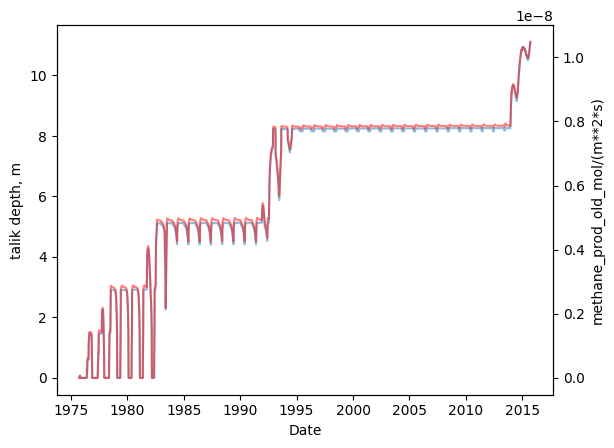

In [29]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.lineplot(data=ch4, x='Date', y='talik depth, m', ax=ax, alpha=0.5)
sns.lineplot(data=ch4, x='Date', y='methane_prod_old_mol/(m**2*s)', ax=ax2, color='red', alpha=0.5)


<Axes: xlabel='Date', ylabel='methane_prod_old_mol/(m**2*s)'>

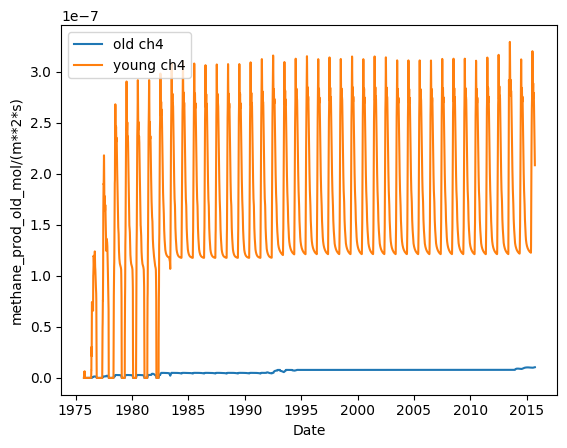

In [15]:
sns.lineplot(data=ch4, x='Date', y='methane_prod_old_mol/(m**2*s)', label='old ch4')
sns.lineplot(data=ch4, x='Date', y='methane_prod_young_mol/(m**2*s)', label='young ch4')

<Axes: xlabel='Date', ylabel='methane_prod_old_mol/(m**2*s)'>

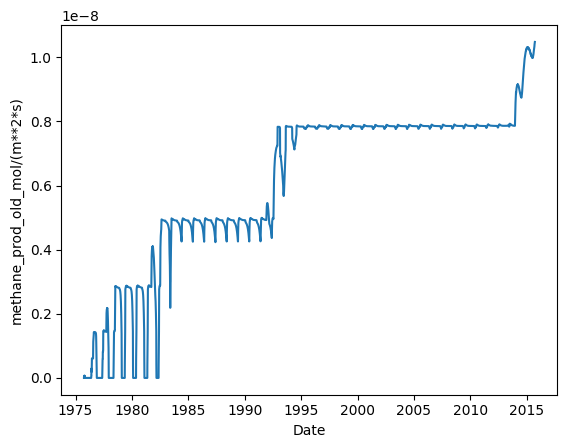